<a href="https://colab.research.google.com/github/chrisguti27/Notebooks/blob/main/AI/Machine%20Learning/Regresi%C3%B3n/SVR/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Support Vector Regression SVR**

In [ ]:
!cd ..
!ls
!git clone https://github.com/chrisguti27/Notebooks.git

Las máquinas de soporte vectorial, SVM por sus siglas en inglés, pueden ser ocupadas tanto para regresión como para clasificación.

Este método consiste en establecer una "calle" y determinar el margen **$\epsilon$** tal que; para regresión se agrupen la máxima cantidad de datos dentro de la calle, y en el caso de clasificación separar lo más posible los datos.

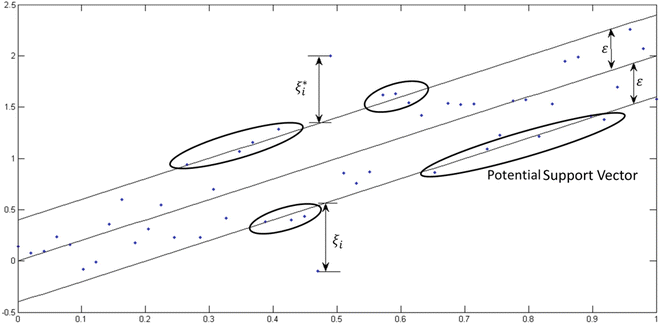


##Regresión:

SVR pueden ser usadas para regresiones lineales y no lineales. Esto dependerá del núcleo o **"kernel"** que se elija dendro del proceso de regresión.

La SVR realiza una regresión en un espacio de orden superior. A modo de ejemplo, si nuestro dataset es 2-D, SVR lo realizará en un espacio 50-D.

Es decir, se aumenta la dimensionalidad del problema.

**Proceso**

1.   Se define el conjunto de entrenamiento $\tau=\{\vec{X},\vec{y}\}$
2.   Elegir el kernel o núcleo, y sus parámetros, así como realizar cualquier **Regularización** de ser necesario.
  
  2.1. Kernel

  Lineal **$<x,y>$**

  No lineal **$<\varphi(x),\varphi(y)> = K(x,y)$** (Gaussiano, es el más usado)

  2.2. Regularización, usualmente es requeridad cuando existe distorsión o ruido en el dataset.

3. Crear la matriz de correlaciones $K$, 

>$K_{i,j} = exp(\displaystyle\sum_{k}\Theta_k|x_k^i-x_k^j|^2)+\epsilon \delta_{i,j}$

4. Entrenar el modelo, de forma exacta o aproximada para obtener los coeficientes de contracción $\vec\alpha = \{\alpha_i\}$

> Se resuelve el sistema:

>$K\vec\alpha = \vec y$

>>Donde:

>>>$\vec y$: es el vector de valores del conjunto de entrenamiento

>>>$K$: es la matriz de correlaciones

>>>$\vec\alpha$: es el conjunto de incógnitas, para los cuales se resuelve el sistema.

>Entonces se tiene

>>$\vec\alpha = K^{-1}\vec y$

5. Se utilizan los coeficientes obtenidos para crear un estimador.

>$f(\vec x,\vec alpha, x^*) = y^*$

>Obtenido $\alpha$, se usan sus coeficientes y el kernel para estimar $y^*$ para un punto/s de test $x^*$

>Para ello se calcula un nuevo vector de correlaciones $\vec k$:

>$k_{i} = exp(\displaystyle\sum_{k}\Theta_k|x_k^i-x_k^*|^2)$

>de donde: $y^* = \vec \alpha \cdot \vec k$

##Algoritmo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

#-----------------IMPORT DATASET-----------------

dataset = pd.read_csv('/content/Notebooks/AI/Machine Learning/Regresión/SVR/Position_Salaries.csv')
X = dataset.iloc[:,1:2].values 
y = dataset.iloc[:,2].values
#como el dataset es pequeño no tiene sentido separar en training y test

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [ ]:
#Ajustar con el dataset
from sklearn.svm import SVR #libreria para SVR
regression = SVR(kernel = "rbf")# regresion de modelo gaussiano
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
regression.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

##Prediccion

In [ ]:
#prediccion
y_pred = sc_y.inverse_transform(regression.predict(sc_X.transform(np.array([[6.5]]))))#se escala el valor que se va a predecir
y_pred

array([170370.0204065])

##Plot

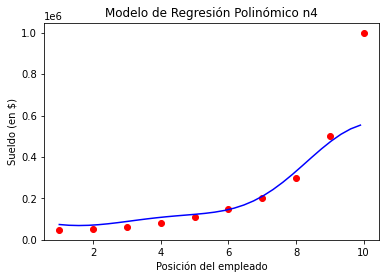

In [ ]:
#plot
X_grid = np.arange(min(X),max(X),0.1)# para evitar que el gráfico salga a trozos
X_grid = X_grid.reshape(len(X_grid),1)
X_1 = X_grid#Poly_reg.fit_transform(X_grid) #los X que se quieren predecir en el plot
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = "red")
plt.plot(sc_X.inverse_transform(X_1), sc_y.inverse_transform(regression.predict(X_1)), color = "blue")
plt.title("Modelo de Regresión Polinómico n4")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()